# TP Denial of Service
### emmanuel Pellegrin

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pyspark.sql import SparkSession

In [18]:
spark = SparkSession.builder.appName("Python Spark").getOrCreate()
sc = spark.sparkContext

# Chargement des données csv

In [19]:
df_ddos = spark.read\
    .option("delimiter", ",")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .csv('dataset.netflow')

récupération des noms des colonnes

In [20]:
df_ddos.printSchema()

root
 |-- Date flow start: string (nullable = true)
 |-- Durat: double (nullable = true)
 |-- Prot: string (nullable = true)
 |-- dir: string (nullable = true)
 |-- Flags: string (nullable = true)
 |-- Tos: double (nullable = true)
 |--   Packets: double (nullable = true)
 |-- Bytes: double (nullable = true)
 |-- Flows: double (nullable = true)
 |-- SourceIP: string (nullable = true)
 |-- SourcePort: string (nullable = true)
 |-- DestIP: string (nullable = true)
 |-- DestPort: string (nullable = true)



### extraction des adresses  sources les plus fréquentes
je veux afrficher une tableau des 50 adresses les plus actives

In [26]:
df_source_sum =(
df_ddos.groupBy('SourceIP')\
               .count()\
               .sort('count', ascending=False).limit(10))
df_source_sum.show()

+-------------+------+
|     SourceIP| count|
+-------------+------+
|147.32.84.229|821956|
|  147.32.80.9|482639|
| 147.32.84.59|449340|
|147.32.84.138|223952|
| 147.32.96.69|102535|
|147.32.84.118| 53736|
|147.32.86.116| 47220|
| 147.32.85.25| 43420|
|147.32.86.135| 42519|
| 147.32.80.13| 41549|
+-------------+------+



### on affiche le barchart equvallent

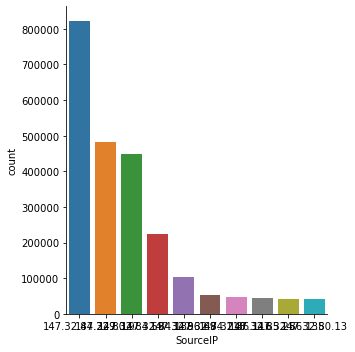

In [27]:
import seaborn as sns
pd_sum = df_source_sum.toPandas()
sns.catplot(x='SourceIP', y='count', data=pd_sum,
            kind='bar', order=pd_sum['SourceIP'])



### extraction des adresse destination les plus fréquentes

In [37]:
df_dest_sum = (df_ddos.groupBy('DestIP')\
            .count()\
            .sort('count', ascending=False).limit(20))

je veux avoir la liste des top x des adresses de destinatio

In [38]:
df_dest_sum.show()

+-------------+------+
|       DestIP| count|
+-------------+------+
|147.32.84.229|785569|
|  147.32.80.9|483657|
| 147.32.84.59|361143|
|147.32.84.138|224358|
| 147.32.96.69|215609|
| 147.32.80.13| 67986|
|147.32.86.116| 45606|
| 147.32.85.25| 43424|
| 147.32.85.26| 42873|
|147.32.84.118| 30570|
| 147.32.85.34| 28093|
|147.32.86.135| 26754|
| 147.32.84.68| 24815|
|147.32.84.111| 20075|
|147.32.86.165| 19075|
|  147.32.85.8| 18830|
|147.32.86.223| 18113|
| 147.32.84.94| 17928|
|147.32.84.170| 15088|
| 76.13.114.90| 15087|
+-------------+------+



on affiche les destinations qui sont le plus sollicités

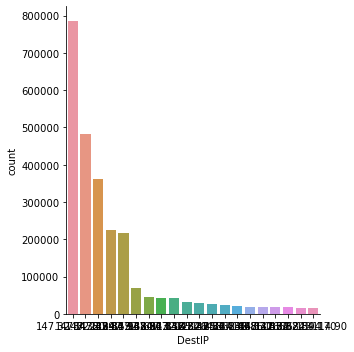

In [39]:
import seaborn as sns
pd_sum_dest = df_dest_sum.toPandas()
sns.catplot(x='DestIP', y='count', data=pd_sum_dest,
            kind='bar', order=pd_sum_dest['DestIP'])

on remarque que c'est l'adresse 174.32.84.229 qui est le plus touché

du coup je me focalise uniquement sur cette adresse en filtrant les logs

In [50]:
df_ddos_filtered = df_ddos.filter(df_ddos['DestIP']=="147.32.84.229")

In [51]:
df_ddos_filtered.show(10)

+--------------------+-----+----+---+-----+---+---------+------+-----+---------------+----------+-------------+--------+
|     Date flow start|Durat|Prot|dir|Flags|Tos|  Packets| Bytes|Flows|       SourceIP|SourcePort|       DestIP|DestPort|
+--------------------+-----+----+---+-----+---+---------+------+-----+---------------+----------+-------------+--------+
|2011-08-18 10:19:...|2.022| UDP| ->|  INT|0.0|      2.0| 354.0|  1.0|115.108.130.214|     54176|147.32.84.229|   13363|
|2011-08-18 10:19:...|  0.0| UDP| ->|  INT|0.0|      1.0|  75.0|  1.0|  86.161.84.198|     31480|147.32.84.229|   13363|
|2011-08-18 10:19:...|  0.0| UDP| ->|  INT|0.0|      1.0| 182.0|  1.0|213.155.227.215|     35316|147.32.84.229|   13363|
|2011-08-18 10:19:...|3.827| TCP| ->|  PA_|0.0|      5.0| 853.0|  1.0| 147.213.68.141|      1040|147.32.84.229|   13363|
|2011-08-18 10:19:...|0.417| UDP| ->|  INT|0.0|      2.0| 271.0|  1.0| 192.166.145.21|      1708|147.32.84.229|   13363|
|2011-08-18 10:19:...|0.091| UDP

j'essaye de voir précisemment le top x des sources sur cette adresse

In [53]:
df_source_filtered_sum =(
df_ddos_filtered.groupBy('SourceIP')\
               .count()\
               .sort('count', ascending=False).limit(50))
df_source_filtered_sum.show()


+---------------+-----+
|       SourceIP|count|
+---------------+-----+
| 85.115.136.209| 2536|
|  195.187.155.2| 2188|
|194.228.143.168| 1818|
|   208.88.186.6| 1815|
| 94.232.217.154| 1572|
|  195.228.28.71| 1520|
|  195.59.102.18| 1492|
|213.155.227.215| 1443|
|  87.197.101.95| 1367|
|217.110.123.146| 1316|
|  81.90.173.232| 1230|
|195.122.213.179| 1099|
| 88.255.232.197| 1010|
|  147.122.45.75|  986|
|    212.39.97.9|  947|
|  82.208.45.106|  879|
| 195.26.133.165|  872|
|  82.79.199.104|  859|
|   78.109.15.79|  838|
|  143.169.4.196|  837|
+---------------+-----+
only showing top 20 rows



### j'affiche le diagramme des adresse IP qui se connectent à  l'IP 147.32.84.229

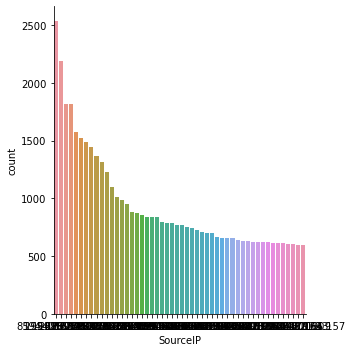

In [54]:
import seaborn as sns
pd_filtered_sum = df_source_filtered_sum.toPandas()
sns.catplot(x='SourceIP', y='count', data=pd_filtered_sum,
            kind='bar', order=pd_filtered_sum['SourceIP'])


In [58]:
df_source_filtered_agg_sum =(df_ddos_filtered.groupBy('SourceIP')\
               .agg({'Bytes': 'sum'})\
               .sort('sum(Bytes)', ascending=False)\
                             .limit(50))
df_source_filtered_agg_sum.show()

+---------------+----------+
|       SourceIP|sum(Bytes)|
+---------------+----------+
|217.110.123.146| 1465990.0|
| 85.115.136.209| 1440912.0|
|  195.59.102.18|  839294.0|
|  128.141.37.11|  720684.0|
|  195.187.155.2|  681628.0|
|  146.193.52.17|  660316.0|
|   208.88.186.6|  610247.0|
|  87.197.101.95|  607324.0|
|  195.228.28.71|  555759.0|
|  81.191.93.173|  553306.0|
|  147.122.45.75|  552896.0|
|   78.109.15.79|  528438.0|
| 212.24.132.190|  524885.0|
| 195.26.133.165|  520011.0|
|    212.39.97.9|  517335.0|
| 88.255.232.197|  514119.0|
|  140.78.116.98|  501957.0|
|194.228.143.168|  501301.0|
|  130.37.31.212|  411807.0|
|   147.32.97.21|  392888.0|
+---------------+----------+
only showing top 20 rows



encore une fois on visualise :

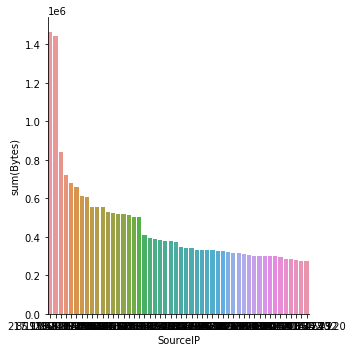

In [60]:
import seaborn as sns
pd_filtered_agg_sum = df_source_filtered_agg_sum.toPandas()
sns.catplot(x='SourceIP', y='sum(Bytes)', data=pd_filtered_agg_sum,
            kind='bar', order=pd_filtered_agg_sum['SourceIP'])
